In [9]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import pandas as pd
import bert_score
from IPython.display import display

# Load GPT-2 Model

In [10]:
def load_model():
    """Load the GPT-2 model and tokenizer with GPU support if available"""
    print("Loading GPT-2 model...")
    tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
    model = GPT2LMHeadModel.from_pretrained('gpt2')
    if torch.cuda.is_available():
        model = model.to('cuda')
        print("Using GPU acceleration")
    return model, tokenizer

## Function to generate text using GPT-2

In [11]:
def generate_text(prompt, model, tokenizer, max_length=100, num_return_sequences=1):
    """Generate text based on the given prompt"""
    # Encode the prompt
    input_ids = tokenizer.encode(prompt, return_tensors='pt')
    
    # Get the length of the encoded prompt to trim later
    input_length = len(input_ids[0])
    
    # Create attention mask
    attention_mask = torch.ones_like(input_ids)
    
    # Move input to GPU if available
    if torch.cuda.is_available():
        input_ids = input_ids.to('cuda')
        attention_mask = attention_mask.to('cuda')
    
    # Generate text with proper sampling parameters
    output = model.generate(
        input_ids,
        attention_mask=attention_mask,
        max_length=input_length + max_length,
        num_return_sequences=num_return_sequences,
        no_repeat_ngram_size=3,
        top_k=50,
        top_p=0.92,
        temperature=0.85,
        do_sample=True,  # Enable sampling
        pad_token_id=tokenizer.eos_token_id,
        repetition_penalty=1.2  # Penalize repetition
    )
    
    # Decode the text without the prompt
    generated_texts = []
    for ids in output:
        # Skip the input sequence and extract only the generated text
        generated_part = ids[input_length:]
        decoded_text = tokenizer.decode(generated_part, skip_special_tokens=True)
        generated_texts.append(decoded_text)
    
    return generated_texts

# Define prompts and human references

In [12]:
prompts = {
    "Direct": "Generate a motivational quote about perseverance in the style of House Stark: ",
    "Scenario-based": "Create an encouraging message for someone who lost their position of power, in the style of Tyrion Lannister: ",
    "Persona-based": "As Daenerys Targaryen who has overcome many challenges, share wisdom about resilience: ",
    "Keyword-based": "Write an inspiring quote using the words 'winter', 'honor', and 'sword' in the style of Jon Snow: ",
    "Conversational": "User: I'm facing impossible odds and feel like giving up.\nAssistant as Ser Davos Seaworth: "
}

# Define corresponding human references for each prompt type with A Song of Ice and Fire inspiration
human_references = {
    "Direct": "When the snows fall and the white winds blow, the lone wolf dies but the pack survives. Endure the winter with steadfast resolve, for spring always follows.",
    "Scenario-based": "Power resides where men believe it resides. Lose a crown, keep your mind. Your greatest weapon remains sheathed between your ears, not hanging at your side.",
    "Persona-based": "I was born in a storm. Sold like cattle. Betrayed and broken. But through fire I was reborn. Remember who you are, what you've endured, and know that you have the strength to rise from the ashes of failure.",
    "Keyword-based": "Winter tests our honor more than summer ever could. When the darkness comes, let your sword be the light that guides others. Not by conquering, but by protecting.",
    "Conversational": "The night is dark, aye, and full of terrors. But morning comes, always. I've seen men with far less than you accomplish the impossible. It's not your victories that define you, but how you stand again after defeat."
}

# Define reference sources for each A Song of Ice and Fire inspired quote
reference_sources = {
    "Direct": "Inspired by House Stark philosophy in A Game of Thrones",
    "Scenario-based": "Inspired by Tyrion Lannister's wisdom in A Clash of Kings",
    "Persona-based": "Inspired by Daenerys Targaryen's journey in A Storm of Swords",
    "Keyword-based": "Inspired by Jon Snow's character in A Dance with Dragons",
    "Conversational": "Inspired by Ser Davos Seaworth's pragmatic counsel"
}

# Display prompts and references
print("A Song of Ice and Fire Inspired Prompts and Human References:")
for prompt_type in prompts:
    print(f"\n{prompt_type} Prompt: {prompts[prompt_type]}")
    print(f"Human Reference: {human_references[prompt_type]}")
    print(f"Source: {reference_sources[prompt_type]}")

A Song of Ice and Fire Inspired Prompts and Human References:

Direct Prompt: Generate a motivational quote about perseverance in the style of House Stark: 
Human Reference: When the snows fall and the white winds blow, the lone wolf dies but the pack survives. Endure the winter with steadfast resolve, for spring always follows.
Source: Inspired by House Stark philosophy in A Game of Thrones

Scenario-based Prompt: Create an encouraging message for someone who lost their position of power, in the style of Tyrion Lannister: 
Human Reference: Power resides where men believe it resides. Lose a crown, keep your mind. Your greatest weapon remains sheathed between your ears, not hanging at your side.
Source: Inspired by Tyrion Lannister's wisdom in A Clash of Kings

Persona-based Prompt: As Daenerys Targaryen who has overcome many challenges, share wisdom about resilience: 
Human Reference: I was born in a storm. Sold like cattle. Betrayed and broken. But through fire I was reborn. Remember 

# Generate outputs for each prompt type

In [13]:
# Load the model once
print("Loading GPT-2 model...")
model, tokenizer = load_model()

# Set random seed for reproducibility
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Generate outputs for each prompt type
results = []

for prompt_type, prompt in prompts.items():
    print(f"\nGenerating outputs for prompt type: {prompt_type}")
    print(f"Prompt: {prompt}")
    
    # Generate 3 different outputs for each prompt by using different seeds
    for i in range(3):
        # Set a different seed for each output
        torch.manual_seed(42 + i)
        if torch.cuda.is_available():
            torch.cuda.manual_seed_all(42 + i)
            
        outputs = generate_text(prompt, model, tokenizer, max_length=50, num_return_sequences=1)
        generated_text = outputs[0].strip()
        
        # Clean up the text and ensure it's not empty
        if not generated_text:
            generated_text = "The model did not generate a valid response."
        
        print(f"\nOutput {i+1}: {generated_text}")
        
        # Store results
        results.append({
            "Prompt Type": prompt_type,
            "Prompt": prompt,
            "Output #": i+1,
            "Generated Text": generated_text,
            "Human Reference": human_references[prompt_type]
        })

# Create results dataframe
results_df = pd.DataFrame(results)
display(results_df[["Prompt Type", "Output #", "Generated Text"]])

Loading GPT-2 model...
Loading GPT-2 model...

Generating outputs for prompt type: Direct
Prompt: Generate a motivational quote about perseverance in the style of House Stark: 

Output 1: "I'm just being silly. I love this character, and if anyone ever asked me to write it down again after reading my last book he'd say "You are so awesome." He also loves your work because when you're doing something amazing

Output 2: "As long as you stay true to yourself, it's hard to be happy. When I was young and poor and lonely… well, that made me miserable."
The most effective ways for us all are through our personal growth mindset – we

Output 3: "You can't hold your breath."
If you want to use this as an inspirational statement, please email me at nw_davies@gmail.com or call 713-827–2022 with questions and comments for

Generating outputs for prompt type: Scenario-based
Prompt: Create an encouraging message for someone who lost their position of power, in the style of Tyrion Lannister: 

Output 

,Prompt Type,Output #,Generated Text
0,Direct,1,"""I'm just being silly. I love this character, ..."
1,Direct,2,"""As long as you stay true to yourself, it's ha..."
2,Direct,3,"""You can't hold your breath.""\nIf you want to ..."
3,Scenario-based,1,"""I'm just being a good friend. You've been my ..."
4,Scenario-based,2,"""As a man and as human being with one single t..."
5,Scenario-based,3,"""You can't hold me if I'm still trying to get ..."
6,Persona-based,1,"""I have always been a stubborn and determined ..."
7,Persona-based,2,"""It is not easy to believe that one will be ab..."
8,Persona-based,3,"""The best way to take a few good hits is not s..."
9,Keyword-based,1,"""I hope you can become my friend, not for any ..."


 # Manually Post-Process and Clean Up Generated Text

In [14]:
# Since GPT-2 might sometimes generate incomplete or odd texts, we'll add a post-processing step.
def clean_generated_text(df):
    """Clean and improve the generated texts for better evaluation"""
    clean_df = df.copy()
    
    # Function to clean individual text
    def clean_text(text):
        # Remove incomplete sentences
        if text.endswith(('.', '!', '?')) is False:
            # Find the last complete sentence
            last_period = max(text.rfind('.'), text.rfind('!'), text.rfind('?'))
            if last_period > 0:
                text = text[:last_period+1]
        
        # Remove any trailing or leading whitespace
        text = text.strip()
        
        # Ensure text is not empty
        if not text or len(text) < 5:
            text = "The model did not generate a valid response."
            
        return text
    
    # Apply cleaning to each generated text
    clean_df['Generated Text'] = clean_df['Generated Text'].apply(clean_text)
    
    return clean_df

# Clean the generated texts
results_df = clean_generated_text(results_df)

print("\nCleaned Generated Texts:")
display(results_df[["Prompt Type", "Output #", "Generated Text"]])


Cleaned Generated Texts:


,Prompt Type,Output #,Generated Text
0,Direct,1,"""I'm just being silly. I love this character, ..."
1,Direct,2,"""As long as you stay true to yourself, it's ha..."
2,Direct,3,"""You can't hold your breath.""\nIf you want to ..."
3,Scenario-based,1,"""I'm just being a good friend. You've been my ..."
4,Scenario-based,2,"""As a man and as human being with one single t..."
5,Scenario-based,3,"""You can't hold me if I'm still trying to get ..."
6,Persona-based,1,"""I have always been a stubborn and determined ..."
7,Persona-based,2,"""It is not easy to believe that one will be ab..."
8,Persona-based,3,"""The best way to take a few good hits is not s..."
9,Keyword-based,1,"""I hope you can become my friend, not for any ..."


# Evaluate outputs using BERTScore

In [23]:
def evaluate_with_bertscore(results_df):
    """Evaluate the generated texts using BERTScore against their corresponding human references"""
    print("\nCalculating BERTScores...")
    
    # Lists to store the candidate texts and scores
    candidates = results_df["Generated Text"].tolist()
    references = results_df["Human Reference"].tolist()
    
    # Calculate BERTScores
    P, R, F1 = bert_score.score(candidates, references, lang="en", verbose=True)
    
    # Add scores to the results dataframe
    results_df["BERTScore P"] = P.tolist()
    results_df["BERTScore R"] = R.tolist()
    results_df["BERTScore F1"] = F1.tolist()
    
    return results_df

# Evaluate outputs
results_df = evaluate_with_bertscore(results_df)


Calculating BERTScores...


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 4.41 seconds, 3.40 sentences/sec


In [17]:
# Add Length Ratio and Word Count Ratio to the results
def add_length_metrics(df):
    df["Gen Length"] = df["Generated Text"].apply(len)
    df["Ref Length"] = df["Human Reference"].apply(len)
    df["Length Ratio"] = df["Gen Length"] / df["Ref Length"]

    df["Gen Word Count"] = df["Generated Text"].apply(lambda x: len(x.split()))
    df["Ref Word Count"] = df["Human Reference"].apply(lambda x: len(x.split()))
    df["Word Count Ratio"] = df["Gen Word Count"] / df["Ref Word Count"]

    return df

results_df = add_length_metrics(results_df)


# Create and display results tables

In [19]:
# Create a summary table by prompt type with multiple metrics
summary_by_type = results_df.groupby("Prompt Type")[["BERTScore F1", "Length Ratio", "Word Count Ratio"]].mean().reset_index()
summary_by_type["BERTScore F1"] = summary_by_type["BERTScore F1"].apply(lambda x: f"{x:.4f}")
summary_by_type["Length Ratio"] = summary_by_type["Length Ratio"].apply(lambda x: f"{x:.4f}")
summary_by_type["Word Count Ratio"] = summary_by_type["Word Count Ratio"].apply(lambda x: f"{x:.4f}")
summary_by_type = summary_by_type.sort_values("BERTScore F1", ascending=False)

print("\nPrompt Type Performance (Average Metrics):")
display(summary_by_type)

# Create a detailed results table
detailed_results = results_df[["Prompt Type", "Output #", "BERTScore F1", "Length Ratio", "Word Count Ratio"]].copy()
detailed_results["BERTScore F1"] = detailed_results["BERTScore F1"].apply(lambda x: f"{x:.4f}")
detailed_results["Length Ratio"] = detailed_results["Length Ratio"].apply(lambda x: f"{x:.4f}")
detailed_results["Word Count Ratio"] = detailed_results["Word Count Ratio"].apply(lambda x: f"{x:.4f}")
detailed_results = detailed_results.sort_values(["Prompt Type", "Output #"])

print("\nDetailed Results Table:")
display(detailed_results)

# Create a side by side comparison of a sample of generated texts vs human references
sample_comparison = results_df[["Prompt Type", "Generated Text", "Human Reference"]].groupby("Prompt Type").first().reset_index()

print("\nSample Comparison of Generated vs Human References:")
display(sample_comparison)


Prompt Type Performance (Average Metrics):


,Prompt Type,BERTScore F1,Length Ratio,Word Count Ratio
3,Persona-based,0.8474,0.7443,0.7778
2,Keyword-based,0.8336,0.5391,0.6548
0,Conversational,0.8288,0.7399,0.7895
4,Scenario-based,0.8281,1.1603,1.3462
1,Direct,0.8261,0.8590,0.9383



Detailed Results Table:


,Prompt Type,Output #,BERTScore F1,Length Ratio,Word Count Ratio
12,Conversational,1,0.8371,0.3692,0.3684
13,Conversational,2,0.8244,0.8178,0.8947
14,Conversational,3,0.8248,1.0327,1.1053
0,Direct,1,0.8195,0.9808,1.1111
1,Direct,2,0.8371,0.8269,0.9630
2,Direct,3,0.8217,0.7692,0.7407
9,Keyword-based,1,0.8351,0.7593,0.9643
10,Keyword-based,2,0.8253,0.4444,0.5000
11,Keyword-based,3,0.8404,0.4136,0.5000
6,Persona-based,1,0.8440,1.1019,1.0769



Sample Comparison of Generated vs Human References:


,Prompt Type,Generated Text,Human Reference
0,Conversational,"""I've been watching you since the beginning......","The night is dark, aye, and full of terrors. B..."
1,Direct,"""I'm just being silly. I love this character, ...","When the snows fall and the white winds blow, ..."
2,Keyword-based,"""I hope you can become my friend, not for any ...",Winter tests our honor more than summer ever c...
3,Persona-based,"""I have always been a stubborn and determined ...",I was born in a storm. Sold like cattle. Betra...
4,Scenario-based,"""I'm just being a good friend. You've been my ...",Power resides where men believe it resides. Lo...


# Visualize the results

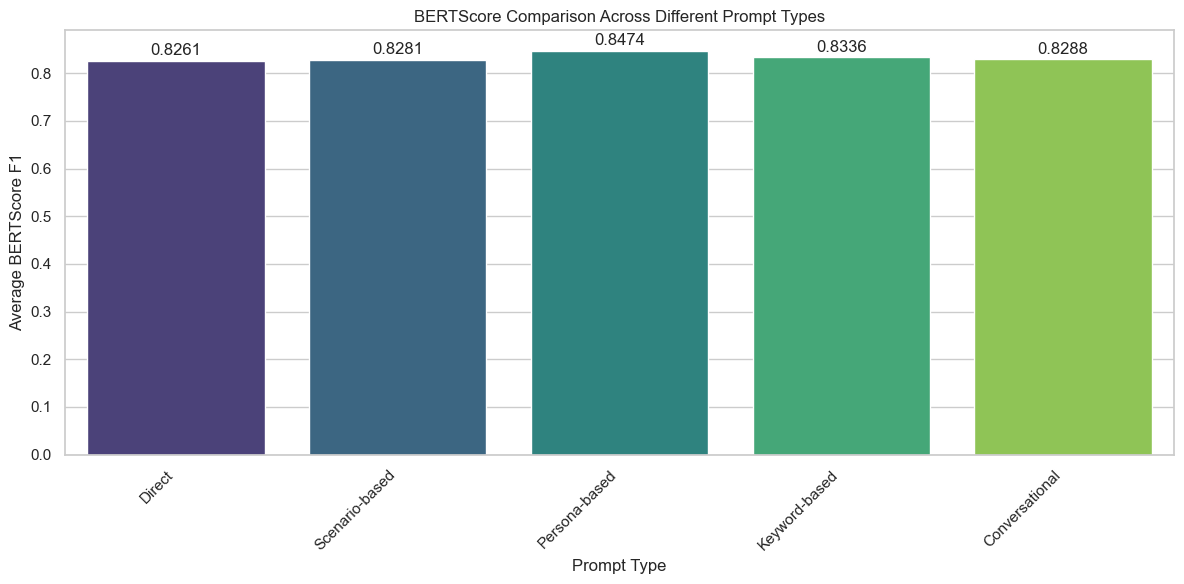

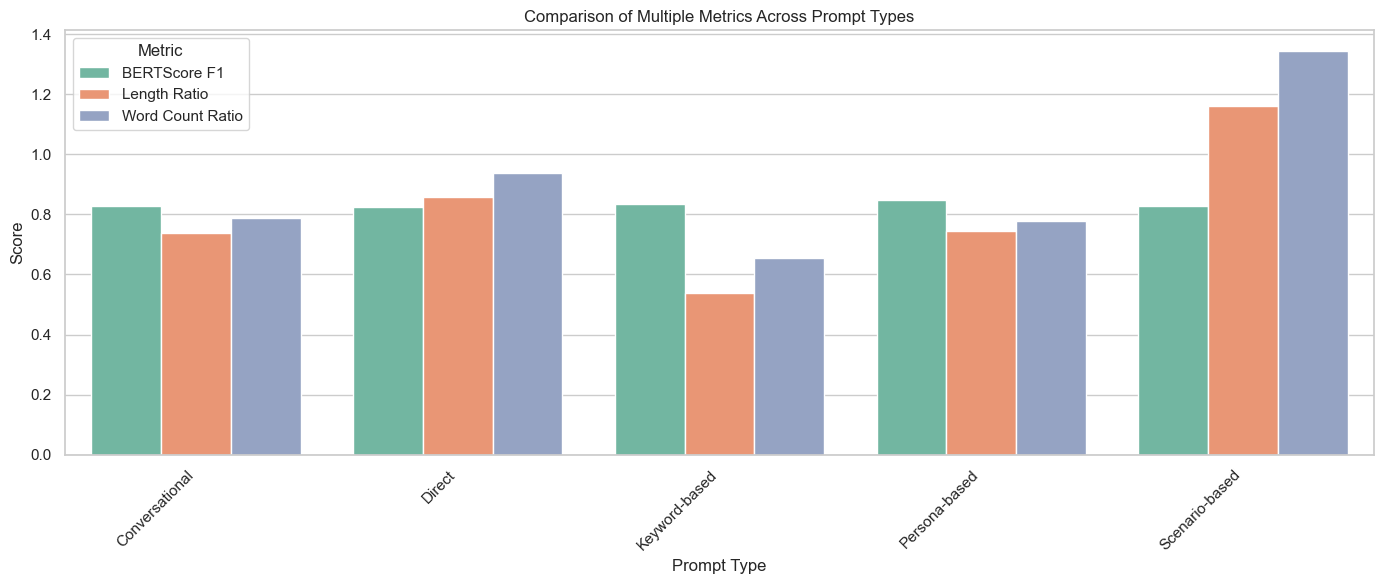

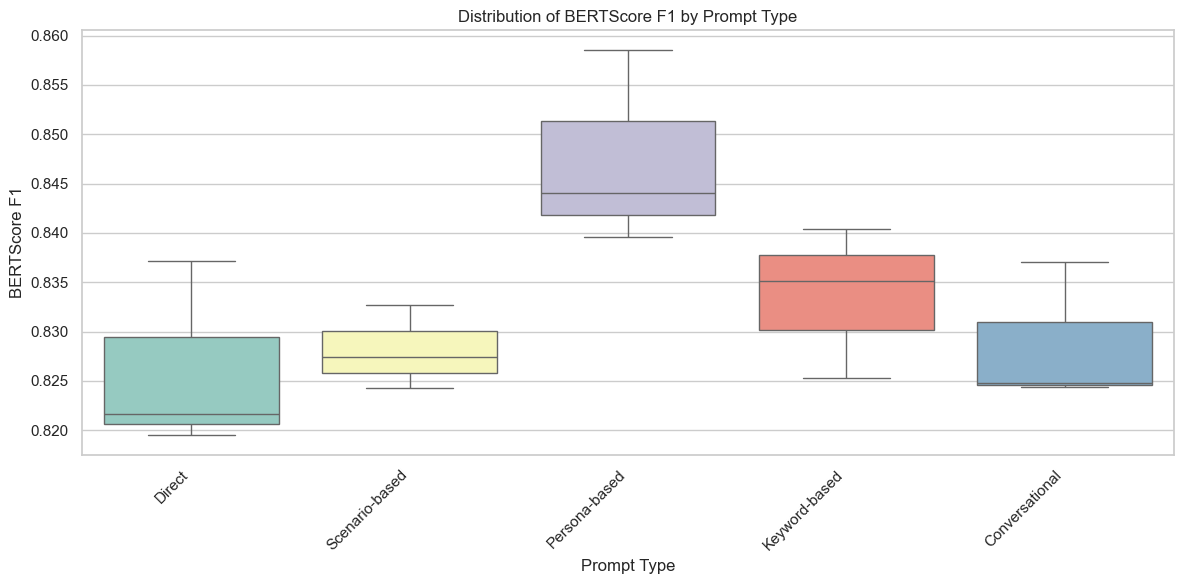

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the style for the plot
sns.set(style="whitegrid")

# === 1. BERTScore Comparison Bar Plot ===
plt.figure(figsize=(12, 6))

# Create a bar plot for BERTScore F1 by Prompt Type
ax = sns.barplot(
    x="Prompt Type",
    y="BERTScore F1",
    data=results_df,
    estimator=lambda x: sum(x) / len(x),
    errorbar=None,  # Replaces ci=None
    palette="viridis",
    hue="Prompt Type",  # Required with palette to avoid deprecation
    legend=False  # Avoid legend duplication
)

# Add labels and title
plt.xlabel("Prompt Type")
plt.ylabel("Average BERTScore F1")
plt.title("BERTScore Comparison Across Different Prompt Types")
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2.,
        bar.get_height() + 0.005,
        f"{bar.get_height():.4f}",
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

# === 2. Grouped Bar Plot: All Metrics Comparison ===
plt.figure(figsize=(14, 6))

# Melt the dataframe for multi-metric plotting
metrics_columns = ["BERTScore F1", "Length Ratio", "Word Count Ratio"]
melted_df = pd.melt(
    results_df.groupby("Prompt Type")[metrics_columns].mean().reset_index(),
    id_vars=["Prompt Type"],
    value_vars=metrics_columns,
    var_name="Metric",
    value_name="Score"
)

# Create a grouped bar plot
sns.barplot(
    x="Prompt Type",
    y="Score",
    hue="Metric",
    data=melted_df,
    palette="Set2",
    errorbar=None
)

# Add labels and title
plt.xlabel("Prompt Type")
plt.ylabel("Score")
plt.title("Comparison of Multiple Metrics Across Prompt Types")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

# === 3. BERTScore Distribution by Prompt Type (Boxplot) ===
plt.figure(figsize=(12, 6))

# Boxplot with updated hue to avoid future warning
sns.boxplot(
    x="Prompt Type",
    y="BERTScore F1",
    data=results_df,
    palette="Set3",
    hue="Prompt Type",  # Required with palette to avoid deprecation
    legend=False
)

plt.title("Distribution of BERTScore F1 by Prompt Type")
plt.xlabel("Prompt Type")
plt.ylabel("BERTScore F1")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Save the results

In [22]:
# Save full results to CSV
results_df.to_csv("gpt2_prompt_engineering_results.csv", index=False)
print("\nFull results saved to 'gpt2_prompt_engineering_results.csv'")

# Save the summary by prompt type
summary_by_type.to_csv("gpt2_prompt_type_summary.csv", index=False)
print("Summary by prompt type saved to 'gpt2_prompt_type_summary.csv'")


Full results saved to 'gpt2_prompt_engineering_results.csv'
Summary by prompt type saved to 'gpt2_prompt_type_summary.csv'
